In [1]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

#Kullanacağımız kütüphaneleri ve modelleri tek tek içeri aktarıyoruz. Resimleri çizdirebilmek, dizilere çevirebilmek
# vb. bir çok işlemi gerçekleştirebilmek için bu kütüphanelere ihtiyacımız var.

In [2]:
img_array = cv2.imread("C:/Users/sedan/Desktop/archive/train/0/Training_556531.jpg")
#Bir adet resmi okumaya çalışıyoruz.Erişip erişemediğimizi kontrol edebilmek için.

In [3]:
img_array.shape #rgb bilgilerini (boyut) almaya çalışıyoruz.
#(48x48 boyut elde ediyoruz.)

(48, 48, 3)

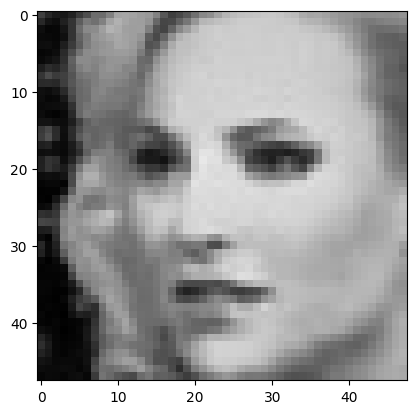

In [4]:
plt.imshow(img_array) #resmi çizdiriyoruz.(jupyter notebook direkt çizdiriyor.)

In [5]:
datadirectory = "C:/Users/sedan/Desktop/archive/train"
#training kümesi için dosya yolumuzu kaydediyoruz. Değişim ve yazım işlemleri daha kolay olsun diye.

In [6]:
classes = ["0","1","2","3","4","5","6"] # Sınıfların listesini oluşturuyoruz.Dosya isimlerinin birebir aynısı olmalı.

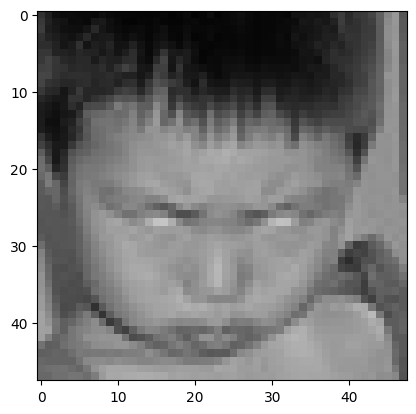

In [7]:
#Her klasördeki resim dosyalarını işlemek için iç içe döngü başlatıyoruz.
for category in classes:
    path = os.path.join(datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))#dosyayı oku
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        #openCV BGR renk düzenini, matplotlib ise RGB renk düzenini kullanır. Bunun için değiştiriyoruz.
        plt.show()
        break
    break

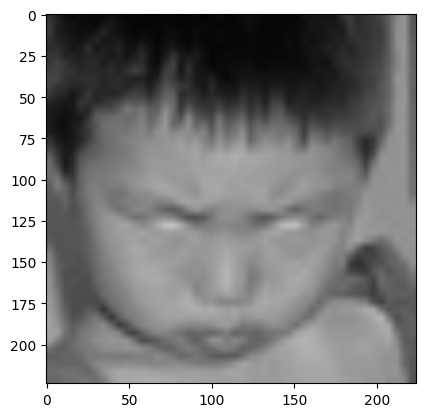

In [8]:
img_size = 224 #224 x 224 şekline getiriyoruz.
#Model eğitim setine uygun bir giriş haline getirmeye çalışıyoruz.
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape
#Bilgiler değişmiş mi kontrol ediyoruz.

(224, 224, 3)

In [10]:
training_data = [] #dizinin içerisinde tutacağız.Şu an liste halinde. Eğitim veri seti oluşturuyoruz.

def create_training_data():
    for category in classes:
        path = os.path.join(datadirectory,category)
        class_num = classes.index(category) ##0,1 ##label belirliyoruz.
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))#yeniden boyutlandırıyoruz
                training_data.append([new_array,class_num])#diziye ekliyoruz.
            except Exception as e:
                pass#hata oluştuğunda görmezden geliyoruz.
            

In [11]:
create_training_data()

In [12]:
print(len(training_data))

6548


In [13]:
import random

random.shuffle(training_data)#Eğitim verilerini karıştırıyoruz.Overfittingi azaltıyoruz.

In [14]:
x = [] #data,feature bilgilerini tutacağız.
y = []  #label bilgilerini tutacağız.

for features,label in training_data:#training_data içindeki her bir örnek için
    x.append(features)#özellikleri x'e
    y.append(label)#etiketleri y'ye ekliyoruz.
x = np.array(x).reshape(-1, img_size, img_size, 3)# 4 boyutlu hale çeviriyoruz.

In [15]:
x.shape

(6548, 224, 224, 3)

In [16]:
x = x/255.0; # veriyi normalize etmeye çalışıyoruz.Daha hızlı ve stabil bir öğrenme gerçekleşmesi için.

In [17]:
y[0]#etiket kontrolü yapıyoruz.

0

In [20]:
type(y)

list

In [21]:
Y = np.array(y) #etiketleri numpy dizisine çeviriyoruz. üzerinde işlem yapabilmek için. 

In [22]:
Y.shape

(6548,)

In [23]:
#Derin öğrenme modeline geçiyoruz. Eğitime başlıyoruz.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = tf.keras.applications.MobileNetV2() #pre-trained modelimiz

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [26]:
#Transfer learning uyguluyoruz.
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-2].output

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
final_output = layers.Dense(128)(base_output) ## global pooling katmanının çıktısından sonra 
#yeni bir katman ekliyoruz.
activation_func = layers.Activation('relu')(final_output) #activation function u ekledik.
final_output = layers.Dense(64)(activation_func)
activation_func = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(activation_func) #classification layer

In [30]:
final_output #output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
#yeni bir model oluşturuyoruz.

In [32]:
new_model.summary()#eğitim süreci hızlanıyor ve maliyet düşüyor.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [33]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"])#modelimizi compile ediyoruz.

In [34]:
new_model.fit(x,Y, epochs = 1)#eğitim aşaması

205/205 [==============================] - 881s 4s/step - loss: 1.5018 - accuracy: 0.4203


In [35]:
new_model.save("Final_model_01014") #modeli kaydediyoruz.

INFO:tensorflow:Assets written to: Final_model_01014\assets


INFO:tensorflow:Assets written to: Final_model_01014\assets


In [36]:
new_model = tf.keras.models.load_model("Final_model_01014") 

In [37]:
frame = cv2.imread("C:/Users/sedan/Desktop/happywomen2.jpeg") #test verisinde değil de internetten aldığımız
#başka bir veride ne yapacak diye konrtol ediyoruz.

In [38]:
frame.shape

(183, 275, 3)

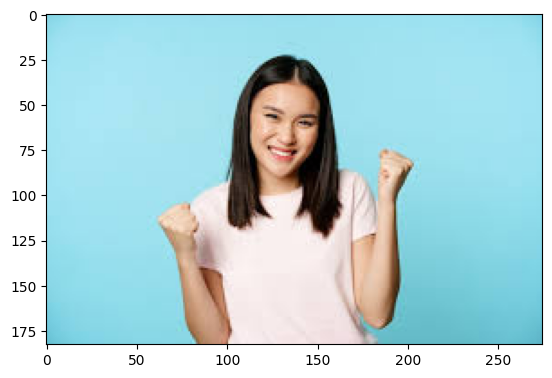

In [39]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [40]:
#Yüz tanıma algoritmasını eklemeliyiz.
#gri resimlerde çalışmalı
#faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#if faceCascade.empty():
#    print("Hata: Cascade Classifier yüklenemedi.")
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [41]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [42]:
gray.shape

(183, 275)

In [43]:
#faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
faces=faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y), (x+w, y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    
    if len(facess) == 0:
        print("Yüz tanımlanamadı.")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

            #resimlerdeki yüzleri tanımlayabilmek ve bir dikdörtgen içinde gösterebilmek için yazdığımız kod
            
print(len(facess))

1


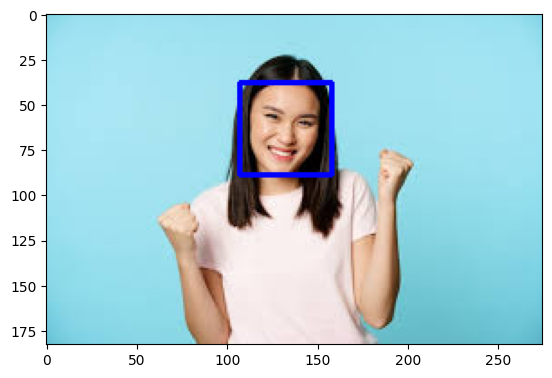

In [44]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

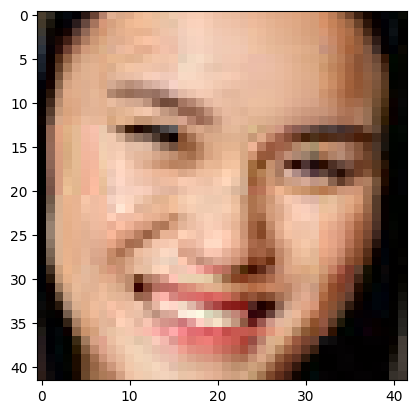

In [45]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [46]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0) # 4 boyutlu haline ihtiyacımız var. 
final_image = final_image/255.0 #normalizasyon işlemi gerçekleştiriyoruz.

In [47]:
Predictions = new_model.predict(final_image)#tahmine geçiyoruz.

1/1 [==============================] - 1s 1s/step


In [48]:
Predictions[0]

array([3.1865123e-04, 1.4979379e-07, 3.1145008e-03, 5.7606595e-03,
       5.4679194e-06, 3.5885030e-05, 9.9076474e-01], dtype=float32)

In [49]:
np.argmax(Predictions)

6

In [50]:
 def kitapOneri(emotion):
    kitaplar = {
        "Angry": ["Ses ve Öfke", "Sis ve Öfke Sarayı", "Öfke Dansı"],
        "Disgust": ["Disgust: The Gatekeeper Emotion", "The Moral Psychology of Disgust", "The Handbook Of Disgust Research"],
        "Fear": ["Fearless Passion", "Feel The Fear And Do It Anyway", "Fearless"],
        "Happy": ["Stumbling On Happiness", "The Happiness Hypothesis", "Flourish"],
        "Sad": ["All The Light We Can Not See", "Beautiful boy", "A Little Life"],
        "Surprise": ["Breathe in Calm", "Mindfulness Meditations", "Stress-free Productivity"],
        "Neutral": ["A Prayer For The Crown Shy", "Great Circle", "The Memories Of Stockholm Sven"]
    }
    
    
    if emotion in kitaplar:
        kitap_str = ",".join(kitaplar[emotion])
    return kitap_str             
            
emotions = " "
              
if(np.argmax(Predictions)==0):
    emotions = "Angry"
    print(emotions)
elif(np.argmax(Predictions)==1):
    emotions = "Disgust"
    print(emotions)
elif(np.argmax(Predictions)==2):
    emotions = "Fear"
    print(emotions)
elif(np.argmax(Predictions)==3):
    emotions = "Happy"
    print(emotions)
elif(np.argmax(Predictions)==4):
    emotions = "Sad"
    print(emotions)
elif(np.argmax(Predictions)==5):
    emotions = "Surprise"
    print(emotions)    
else:
    emotions = "Neutral"
    print(emotions)
              
kitapOneri(emotions)

Neutral


'A Prayer For The Crown Shy,Great Circle,The Memories Of Stockholm Sven'

In [52]:
#Bu kod yukarıdakilerden ayrı olarak yazılmış. Yukarıda eğitim yaptıktan sonra google'dan alınan hazır resim üzerinde test
#işlemi gerçekleştiriliyor. Bu kodda ise webcam ile gerçek zamanlı test yapılmaya çalışılıyor.

import cv2
path="C:/Users/sedan/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN
rectangle_bgr=(255,255,255)
img=np.zeros((500,500))
text="Some text"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap=cv2.VideoCapture(0)
if not cap.isOpened():
    cap=cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("cannot open webcam")
    
while True:
    ret,frame=cap.read()
    faceCascade=cv2.CascadeClassifier("C:/Users/sedan/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
                
    final_image=cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions=new_model.predict(final_image)
    
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    
    if(np.argmax(Predictions)==0):
        status="Angry"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status+"->"+kitapOneri(status),(0,120),font,1,(0,0,255),1,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(Predictions)==1):
        status="Disgust"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status+"->"+kitapOneri(status),(0,120),font,1,(0,0,255),1,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions)==2):
        status="Fear"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status+"->"+kitapOneri(status),(0,120),font,1,(0,0,255),1,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions)==3):
        status="Happy"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status+"->"+kitapOneri(status),(0,120),font,1,(0,0,255),1,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions)==4):
        status="Sad"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status+"->"+kitapOneri(status),(0,120),font,1,(0,0,255),1,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions)==5):
        status="Surprise"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status+"->"+kitapOneri(status),(0,120),font,1,(0,0,255),1,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    else:
        status="Neutral"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status+"->"+kitapOneri(status),(0,120),font,1,(0,0,255),1,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
        
    
    cv2.imshow('Face emotion recognition',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 66ms/step
face not detected
1/1 [==============================] - 0s 54ms/step
face not detected
1/1 [==============================] - 0s 49ms/step
face not detected
1/1 [==============================] - 0s 52ms/step
face not detected
1/1 [==============================] - 0s 51ms/step
face not detected
1/1 [==============================] - 0s 53ms/step
face not detected
1/1 [==============================] - 0s 50ms/step
face not detected
1/1 [==============================] - 0s 54ms/step
face not detected
1/1 [==============================] - 0s 56ms/step
face not detected
1/1 [==============================] - 0s 60ms/step
face not detected
1/1 [==============================] - 0s 60ms/step
face not detected
1/1 [==============================] - 0s 61ms/step
face not detected
1/1 [==============================] - 0s 55ms/step
face not detected
1/1 [==============================] - 0s 58ms/step
face not detected
1/1 [===============

face not detected
1/1 [==============================] - 0s 56ms/step
face not detected
1/1 [==============================] - 0s 56ms/step
